# Семинар 1: разбор задач

Задача 1: 
Найти сумму всех чисел от 1 до 1'000'000.

In [35]:
n = 1000000
sum = ((1+n) * n) // 2   # можно использовать целочисленное деление, т.к. во внешних скобках всегда четное число
print(f"Ответ: {sum}")

Ответ: 500000500000


Задача 2 (Two sum):
Дан отсортированный по возрастанию массив целых чисел и некоторое число target. 
Необходимо найти 2 числа в массиве, которые в сумме дают заданное значение target, и вернуть их индексы.

In [65]:
def twoSum(nums, target):
    left = 0                # левая граница
    right = len(nums) - 1   # правая граница
    while(left < right):
        sum = nums[left] + nums[right]

        if(sum == target):
            return [left, right]
        elif(sum < target):
            left += 1
        else:
            right -= 1
    return "Получить target невозможно!"

# тесты
array_1, target_1 = [3, 8, 9, 11, 16, 18, 19, 21], 25
array_2, target_2 = [1, 2, 3], 8
test_1 = twoSum(array_1, target_1) # ожидается список: [2, 4]
test_2 = twoSum(array_2, target_2) # ожидается: ошибка
print(f"Ответ для теста_1: {test_1}")
print(f"Ответ для теста_2: {test_2}")

Ответ для теста_1: [2, 4]
Ответ для теста_2: Получить target невозможно!


Задача 3 (Разворот массива):
Дан массив целых чисел.
Необходимо развернуть его. Сделать это надо за линейное время без дополнительных аллокаций памяти.

In [203]:
def reverseArr(arr): # решение плюс-минус аналогично решению задачи 2
    left = 0
    right = len(arr) - 1

    while(left<right):
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    return arr

# тесты
array_1 = [3, 8, 9, 11, 16, 18, 19, 21]
array_2 = ['a', 'b', 'c']
test_1 = reverseArr(array_1) # можно и без переменной test_1, т.к. массивы в питоне передаются по ссылке
test_2 = reverseArr(array_2)
print(f"Ответ для теста_1: {test_1}")
print(f"Ответ для теста_2: {test_2}")

# совсем простой способ: разворачиваем реверсированные массивы test_1 и test_2
print(f"Ответ для теста_1 (реверс): {test_1[::-1]}")
print(f"Ответ для теста_2 (реверс): {test_2[::-1]}")

Ответ для теста_1: [21, 19, 18, 16, 11, 9, 8, 3]
Ответ для теста_2: ['c', 'b', 'a']
Ответ для теста_1 (реверс): [3, 8, 9, 11, 16, 18, 19, 21]
Ответ для теста_2 (реверс): ['a', 'b', 'c']


Задача 4 (Разворот части массива):
Дан массив целых чисел.
Необходимо повернуть (сдвинуть) справа налево часть массива, которая указана вторым параметром. Сделать это надо за линейное время без дополнительных аллокаций. Например: Исходный массив: 1, 2, 3, 4, 5, 6, 7; k = 3; Результат: 5, 6, 7, 1, 2, 3, 4

In [205]:
def reversePartArr(arr, k):
    k = k % (len(arr))
    arr = arr[::-1]     #либо можно использовать написанную выше reverseArr(arr), но тогда надо помнить: массив будет передан по ссылке
    arr[:k], arr[k:] = arr[:k][::-1], arr[k:][::-1]
    return arr

# тесты (все результаты должны совпасть)
array_1 = [1,2,3,4,5,6,7]
print(f"Ответ для теста_1: {reversePartArr(array_1, 3)}")
print(f"Ответ для теста_2: {reversePartArr(array_1, 10)}")

Ответ для теста_1: [5, 6, 7, 1, 2, 3, 4]
Ответ для теста_2: [5, 6, 7, 1, 2, 3, 4]


Задача 5 (Слияние двух отсортированных массивов):
Дано 2 отсортированных массива. Необходимо написать функцию, которая объединит эти два массива в один отсортированный.

In [235]:
def merge_sorted_arrays(arr1, arr2):
    arr_res = []
    i, j = 0, 0
    n1 = len(arr1)
    n2 = len(arr2)

    while (i<n1) and (j<n2):
        if arr1[i] < arr2[j]:
            arr_res.append(arr1[i])
            i += 1
        else:
            arr_res.append(arr2[j])
            j += 1
    
    #добавка остатков
    arr_res.extend(arr1[i:])
    arr_res.extend(arr2[j:])

    return arr_res

#тест
array_1 = [1,5,12,14,18]
array_2 = [10,12,15]
print(f"Ответ для теста: {merge_sorted_arrays(array_1, array_2)}")

Ответ для теста: [1, 5, 10, 12, 12, 14, 15, 18]


Задача 6:
Аналогична задаче 5, но теперь первый массив имеет уже подходящую длину в виде суммы длин первого и второго массивов. Остаток первого массива забит нулями.


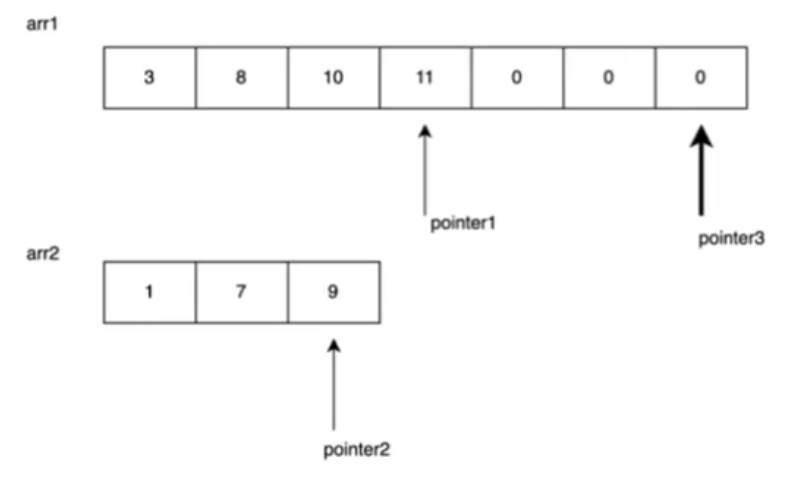

In [251]:
def merge_sorted_arrays_2(arr1, arr2):      #теперь идем справа налево
    pointer1 = len(arr1) - len(arr2) - 1
    pointer2 = len(arr2) - 1
    pointer3 = len(arr1) - 1 

    while pointer2 >= 0:
        if (pointer1>=0) and (arr1[pointer1]>arr2[pointer2]):
            arr1[pointer3] = arr1[pointer1]
            pointer1 -= 1
        else:
            arr1[pointer3] = arr2[pointer2]
            pointer2 -= 1

        pointer3 -= 1

    return arr1

#тест
array_1 = [1,5,12,14,18,0,0,0]
array_2 = [10,12,15]
print(f"Ответ для теста: {merge_sorted_arrays_2(array_1, array_2)}")

Ответ для теста: [1, 5, 10, 12, 12, 14, 15, 18]


Задача 7 (Сортировка массива из 0 и 1):
Дан массив, содержащий только 0 и 1. 
Напишите функцию, которая сортирует его так, чтобы все нули оказались в начале, а все единички - в конце. Решение должно быть in-place.

Будем решать через указатели, но можно просто посчитать число нулей и перезаполнить массив соответствующим числом нулей, заполнив оставшиеся ячейки единицами.

In [257]:
def sum_bin_array(arr):
    left = 0               # левая граница
    right = len(arr) - 1   # правая граница
    while(left < right):
        if(arr[left] == 1):
            arr[left], arr[right] = arr[right], arr[left]
            right -= 1
        else:
            left += 1
    return arr

# тест
array = [0,1,1,0,0,1,1]
print(f"Ответ для теста: {sum_bin_array(array)}")

Ответ для теста: [0, 0, 0, 1, 1, 1, 1]


Задача 8 (флага Нидерландов):
Дан массив состоящий из нулей, единиц и двоек.
Необходимо его отсортировать за линейное время.

In [269]:
def sortColors(nums):
    low = 0
    mid = 0  #индекс текущего элемента
    high = len(nums) - 1

    while mid <= high:
        if nums[mid] == 0:
            nums[low], nums[mid] = nums[mid], nums[low]
            low += 1
            mid += 1
        elif nums[mid] == 1:
            mid += 1
        elif nums[mid] == 2:
            nums[mid], nums[high] = nums[high], nums[mid]
            high -= 1
    return nums

# тест
nums = [2, 0, 2, 1, 1, 0, 1]
print(f"Ответ для теста: {sortColors(nums)}")

Ответ для теста: [0, 0, 1, 1, 1, 2, 2]


Задача 9:
Дан неотсортированный массив целых чисел. 
Необходимо перенести в начало массива все четные числа, сохраняя их очередность.

In [278]:
def change_arr(arr):
    even_Ind = 0
    for i in range (len(arr)):
        if arr[i] % 2 == 0:
            arr[i], arr[even_Ind] = arr[even_Ind], arr[i]
            even_Ind += 1
    return arr

# тест
array = [5, 0, 8, 9, 1, 15, 4]
print(f"Ответ для теста: {change_arr(array)}")

Ответ для теста: [0, 8, 4, 9, 1, 15, 5]


Задача 10 (Нули в конец): 
В школе прошел экзамен по математике. Несколько человек списали решения и были замечены. Этим школьникам поставил 0 баллов. 
Задача: есть массив с оценками, среди которых есть 0. Необходимо все оценки, равные нулю, перенести в конец массива, чтобы все такие школьники оказались в конце списка.

In [283]:
# это по сути задача 7, только наоборот
def marks(arr):
    left = 0               # левая граница
    right = len(arr) - 1   # правая граница
    while(left < right):
        if(arr[left] == 0):
            arr[left], arr[right] = arr[right], arr[left]
            right -= 1
        else:
            left += 1
    return arr

# тест
array = [5, 0, 3, 2, 0, 0, 4, 5, 5, 3]
print(f"Ответ для теста: {marks(array)}")

Ответ для теста: [5, 3, 3, 2, 5, 5, 4, 0, 0, 0]


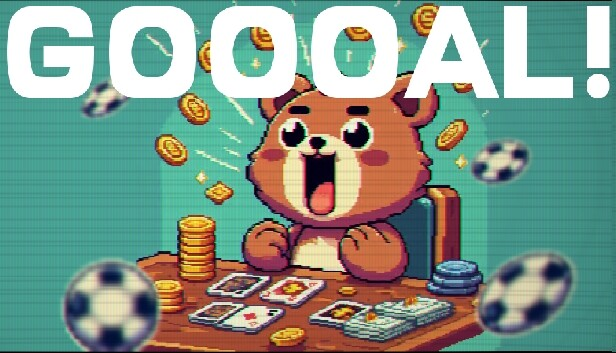